### Determining good thresholds

Previously, we filtered our sample to contain galaxies with MaNGA observations and which have been classified to contain spiral arms by at least one person.

Is at least one classification by a person a good metric though? A large number of classifications as a spiral arm spaxel and a low number as a spaxel of any other morphological feature is definitely grounds for a spiral arm spaxel. However, there may be no definite way to determine the minimum number of classifications as a spiral arm spaxel (spiral threshold; $T_{sp}$), or the maximum number of non-spiral arm classifications (non-spiral threshold; $T_{nsp}$) that would denote a spiral arm. A very low spiral threshold (e.g. 1 classification) would be inadequate as it may include a false-positive due to a mistake, while a very high (e.g. 14 or 15) may disregard a spiral spaxel if missed by a volunteer or two. Similarly, if the non-spiral threshold is too high, morphological features like galactic centres, bars, and foreground stars may be falsely counted as spiral arms, while a low non-spiral threshold will lead to false classifications as a non-spiral spaxel. To get a statistically sound sample, we must determine a good threshold.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, sys
import warnings

sys.path.append(os.path.abspath('../../GZ3D_production/'))
from gz3d_fits import gz3d_fits

/home/sshamsi/miniconda3/envs/marvin/lib/python3.9/site-packages/marvin/core/exceptions.py:50: UserWarning: cannot initiate Sentry error reporting: [Errno 25] Inappropriate ioctl for device.
  warnings.warn('cannot initiate Sentry error reporting: {0}.'.format(str(ee)),
[INFO]: No release version set. Setting default to MPL-11


In [2]:
plt.style.use('seaborn')
plt.style.use('seaborn-colorblind')

In [3]:
manga_gz3d_spiral_paths = np.load('manga_gz3d_spirals.npy', allow_pickle=True)

We'll select some random paths from our `manga_gz3d_spiral_paths` array. We'll see how the spiral regions get defined for these galaxies to determine what threshold works best for our purposed.

We need to determine what thresholds to test in the range $0\leq threshold\leq 15$. We could test all of them to be sure but through the power of hindsight (I've done this before), I know that generally a threshold of ~3 works best and so we'll do thresholds around them. You may change this according to your needs.

In [4]:
thresholds = np.linspace(2, 5, 4)
print(thresholds)

[2. 3. 4. 5.]


Now by comparing images of how spiral regions change with respect to threshold, we can see which one works better. By default, we'll save images to the directory `./Images_Comparing_Thresholds`.

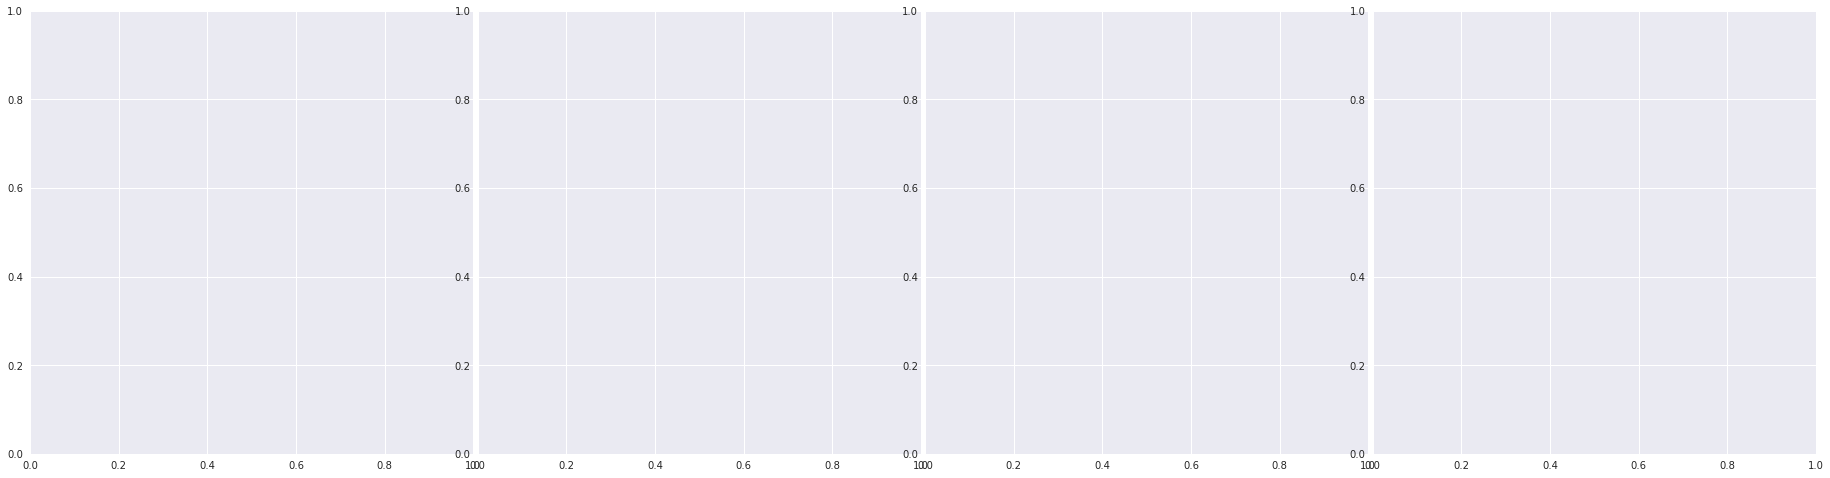

In [5]:
save_imgs = True

rand_paths = np.random.choice(manga_gz3d_spiral_paths, size=5) #making an raay of 5 random galaxies
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(32, 32*4))

for path in rand_paths:
    filename = path.split('/')[-1] + '.png'
    
    data = gz3d_fits(path)
    img = data.image
    spiral_mask = data.spiral_mask
    
    axes[0].text(13, 500, 'MaNGA ID: {}'.format(data.metadata['MANGAID'][0]), color='white', size=16)
    
    for ax, threshold in zip(axes, thresholds):
        ax.axis('off')
        ax.imshow(img)
        
        with warnings.catch_warnings(record=True) as w:
            ax.contour(spiral_mask > threshold, levels=1, colors='white')
            ax.text(13, 29, 'Threshold: {}'.format(str(threshold)), color='white', size=16)
            
            if len(w) > 0:
                ax.text(13, 50, 'No classifications found for threshold', color='white', size=14)
                
    plt.subplots_adjust(wspace=0.01, hspace=0)
    
    if save_imgs:
        plt.savefig('Images_Comparing_Thresholds/{}'.format(filename), format='png', bbox_inches='tight')
        for ax in axes:
            ax.cla()

Now we have all these galaxy images in the `Images_Comparing_Thresholds` folder. We can go through them (or a subset of them really) to figure out what threshold works best for us. And indeed it seems like a threshold of 3 works best for us! Different analyses may require different subsets, and therefore may change what kind of threshold works best.